# Parsing a python program

Fortunately, Python provides a built-in library `ast` (https://docs.python.org/3/library/ast.html) to parse python programs.
Here is an example of how to use `ast`:

In [1]:
import ast
your_code = """
def foo():  # type: ignore
    ret = 2 * 2
    return ret
"""
your_ast = ast.parse(your_code)
print(your_ast)

The `ast.Module` object cannot be printed out with `print()` function. It is necessary to use a presentation function such as:

In [7]:
from ast import AST
from typing import Optional, Any

# Check for rich output
def rich_output() -> bool:
    try:
        get_ipython()  # type: ignore
        rich = True
    except NameError:
        rich = False

    return rich

# Showing ASTs
def show_ast(tree: AST) -> Optional[Any]:
    if rich_output():
        import showast  # We can import showast only when in a notebook
        return showast.show_ast(tree)
    else:
        import ast  # Textual alternative111
        print(ast.dump(tree))
        return None


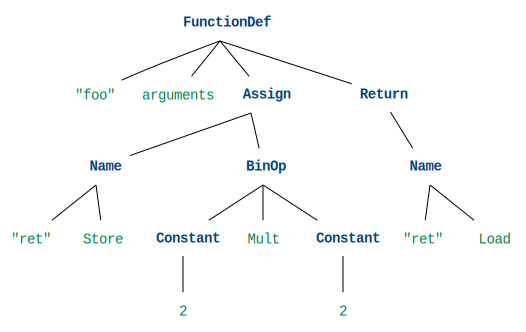

In [9]:
show_ast(your_ast)

Although the above tree-structured representation looks fancy, it is not available in commandline interfaces. You can use the following function instead:

In [12]:
print(ast.dump(your_ast, indent=4))

Module(
    body=[
        FunctionDef(
            name='foo',
            args=arguments(
                posonlyargs=[],
                args=[],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Assign(
                    targets=[
                        Name(id='ret', ctx=Store())],
                    value=BinOp(
                        left=Constant(value=2),
                        op=Mult(),
                        right=Constant(value=2))),
                Return(
                    value=Name(id='ret', ctx=Load()))],
            decorator_list=[])],
    type_ignores=[])


You may want to traverse each element in the ast. 